# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [35]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [36]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head(25)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [37]:
#check for anomalies

fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

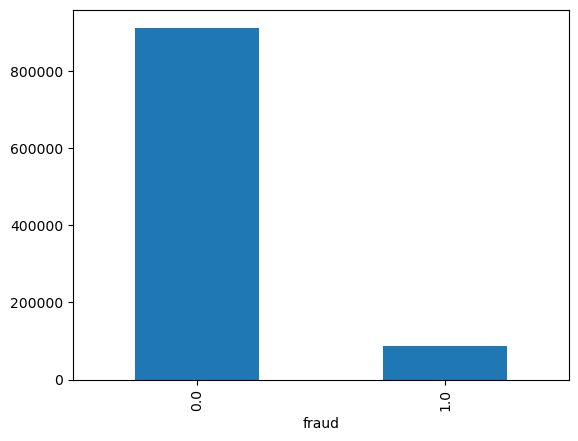

In [38]:
isfraud=fraud['fraud'].value_counts()
isfraud.plot(kind='bar')
plt.show()

In [39]:
#prepare data for model

features=fraud.drop(['fraud'], axis=1)

In [40]:
target=fraud['fraud']

In [41]:
#train test split

X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.20, stratify=target, random_state=42)

In [42]:
fraud.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [43]:
#Normalization
from sklearn.preprocessing import StandardScaler

num_cols=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

bin_cols=['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

In [44]:
scaler=StandardScaler()

#fit scaler to the train set ONLY (prevent data leakage)

scaler.fit(X_train[num_cols])

#transform train set, only numerical columns, leaving binary columns intact 

X_train_num_scaled= scaler.fit_transform(X_train[num_cols])

#transform test set, having the scaler learn the scales from the train only, so now its more realistic
X_test_num_scaled=scaler.transform(X_test[num_cols])

In [45]:
#retrieve binary columns because we lost them in the scaling process
X_train_bin = X_train[bin_cols].values
X_test_bin  = X_test[bin_cols].values

X_train_final = np.concat([X_train_num_scaled, X_train_bin], axis=1)
X_test_final  = np.concat([X_test_num_scaled,  X_test_bin], axis=1)

### Training our model - logistic regression

In [46]:
#Import model

from sklearn.linear_model import LogisticRegression

In [48]:
#definde how model will work before oversampling, undersampling, SMOTE

log_reg=LogisticRegression(max_iter=1000, class_weight=None, random_state=42)

In [49]:
#Train on scaled, unbalanced train set

log_reg.fit(X_train, y_train)

#predict on scaled test set

y_pred=log_reg.predict(X_test_final)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
#Evaluate model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[182497     22]
 [ 16872    609]]
              precision    recall  f1-score   support

         0.0     0.9154    0.9999    0.9558    182519
         1.0     0.9651    0.0348    0.0672     17481

    accuracy                         0.9155    200000
   macro avg     0.9403    0.5174    0.5115    200000
weighted avg     0.9197    0.9155    0.8781    200000



######  So out of 17 481 real frauds, the model only catches 609 and misses 16 872.
###### precision: out of all no fraud predictions, the model catches 91.5%; recall 0.99 -> from all no fraud transcations, model catches practically all of them.
###### excellent performance for class 0 (No Fraud)

###### -----

###### Class 1 Fraud: 
###### For all transcations the model marks as fraud; 96.5 are really fraud good precision but; Recall 0.034 - 3.5%: this means 96.5% of all frauds are not catched. f1 score 0.067, very low. 

###### conclusion: when the model says something is fraud it is actually fraud, but it is very shy at pointing out frauds, so in reality 96% of frauds are not detected by the model . High precission but low coverage. 

In [54]:
#now let´s do Oversampling - > Duplicate randomly class 1 samples until there are same amount of records of 1 and 0s in the train set. 

from imblearn.over_sampling import RandomOverSampler

In [55]:
#create over sampler
ros=RandomOverSampler(random_state=42)

#re sample TRAIN set
X_train_ros, y_train_ros = ros.fit_resample(X_train_final, y_train)

print("Original distribution y_train:")
print(y_train.value_counts())
print("\nDistribution after oversampling:")
print(y_train_ros.value_counts())


Original distribution y_train:
fraud
0.0    730078
1.0     69922
Name: count, dtype: int64

Distribution after oversampling:
fraud
0.0    730078
1.0    730078
Name: count, dtype: int64


In [56]:
# now train the same logistic regression but with y train oversampled

log_reg_ros=LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
log_reg_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(max_iter=1000, random_state=42)

In [58]:
#predict and evaluate 

y_pred_ros=log_reg_ros.predict(X_test_final)

print("\nResults w Oversampling:")
print(confusion_matrix(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros, digits=4))


Results w Oversampling:
[[170388  12131]
 [   908  16573]]
              precision    recall  f1-score   support

         0.0     0.9947    0.9335    0.9631    182519
         1.0     0.5774    0.9481    0.7177     17481

    accuracy                         0.9348    200000
   macro avg     0.7860    0.9408    0.8404    200000
weighted avg     0.9582    0.9348    0.9417    200000



In [ ]:
#huge jump in the results, great improvement. From detecting only 3.5% of frauds, to now detecting 94.8%. 
# Of course theres a downside, we got more false positives than before but we are covering with success 90+% of
#  the actual frauds. Which is what matters the most to us in this case

In [61]:
#now let´s do undersampling 

from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
# create under sample

rus=RandomUnderSampler(random_state=42)

#re sample only train set x & y

X_train_rus, y_train_rus = rus.fit_resample(X_train_final, y_train)

print("Original distribution y_train:")
print(y_train.value_counts())
print("\nDistribution after Undersampling:")
print(y_train_rus.value_counts())

Original distribution y_train:
fraud
0.0    730078
1.0     69922
Name: count, dtype: int64

Distribution after Undersampling:
fraud
0.0    69922
1.0    69922
Name: count, dtype: int64


In [65]:
log_res_rus=LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
log_res_rus.fit(X_train_rus, y_train_rus)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
#predit & evaluate

y_pred_rus=log_res_rus.predict(X_test_final)

print("\nResults undersampling:")
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus, digits=4))


Results undersampling:
[[170380  12139]
 [   917  16564]]
              precision    recall  f1-score   support

         0.0     0.9946    0.9335    0.9631    182519
         1.0     0.5771    0.9475    0.7173     17481

    accuracy                         0.9347    200000
   macro avg     0.7859    0.9405    0.8402    200000
weighted avg     0.9581    0.9347    0.9416    200000



In [67]:
#practicallly same results as oversampling, very close perfoermance, overwhelming enhancement from baseline. 

In [68]:
#Let´s do SMOTE

from imblearn.over_sampling import SMOTE 

In [70]:
#create SMOTE object
smote= SMOTE(random_state=42)

#Re sampling only train sets

X_train_sm, y_train_sm= smote.fit_resample(X_train_final, y_train)

In [71]:
#train the model with SMOTE data

log_reg_sm= LogisticRegression(max_iter=1000, class_weight=None, random_state=42)

log_reg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
##predict and evaluate

y_pred_sm=log_reg_sm.predict(X_test_final)


print("\nresults w SMOTE:")
print(confusion_matrix(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm, digits=4))


results w SMOTE:
[[170384  12135]
 [   909  16572]]
              precision    recall  f1-score   support

         0.0     0.9947    0.9335    0.9631    182519
         1.0     0.5773    0.9480    0.7176     17481

    accuracy                         0.9348    200000
   macro avg     0.7860    0.9408    0.8404    200000
weighted avg     0.9582    0.9348    0.9417    200000



In [ ]:
#with smote we capture 95% of overall frauds. In exchange of generating more false positives, similar to the other methods

#in a real case scenario, based on these results we should use either oversampling or SMOTE because we have gotten the best results with those balacing methods. 